# 1. Data Understanding

## Collecting Initial Data

In [4]:
from google.colab import files
import pandas as pd

# Upload the file and load it into a DataFrame
uploaded = files.upload()
data = pd.read_csv('AB_NYC_2019.csv')


Saving AB_NYC_2019.csv to AB_NYC_2019.csv


## Describing Data

In [5]:
# Display the first few rows of the dataset to understand its structure
print("First five rows of the dataset:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
data.info()

First five rows of the dataset:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149       

In [6]:
# Display summary statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
print(data.describe())

# Display summary statistics for categorical columns
print("\nBasic Statistics for Categorical Columns:")
print(data.describe(include='object'))


Basic Statistics for Numerical Columns:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.68044

## Exploring Data

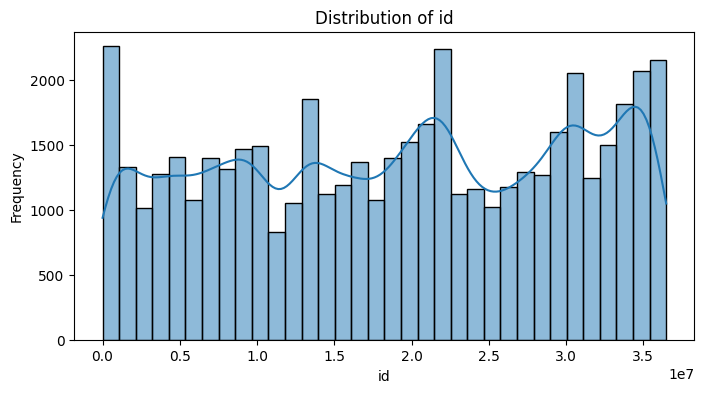

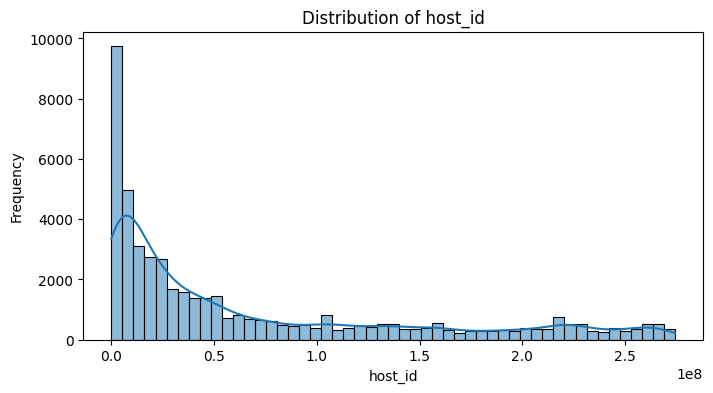

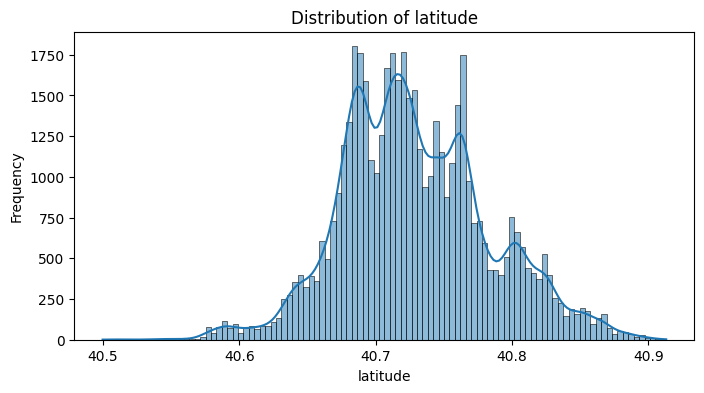

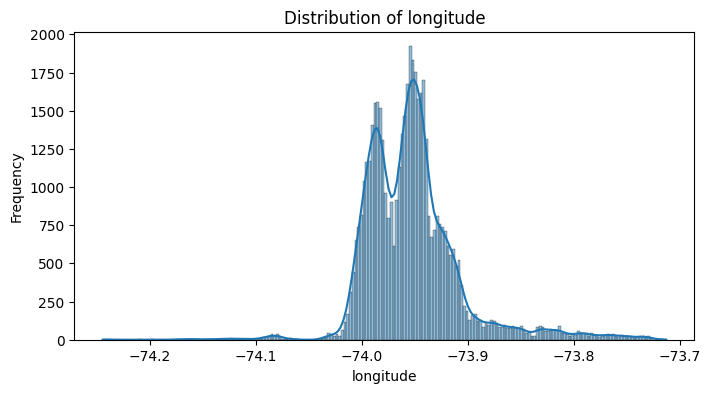

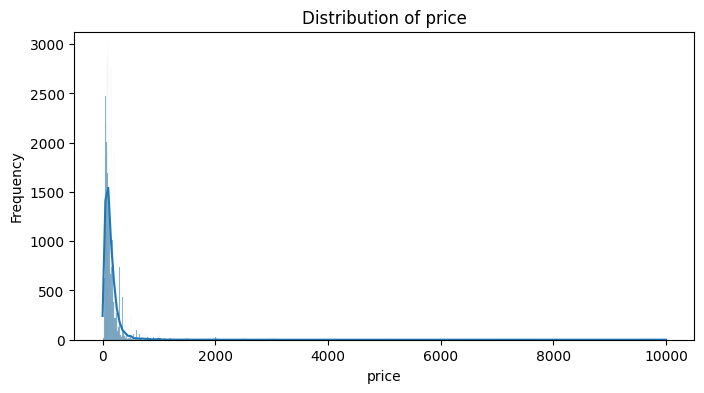

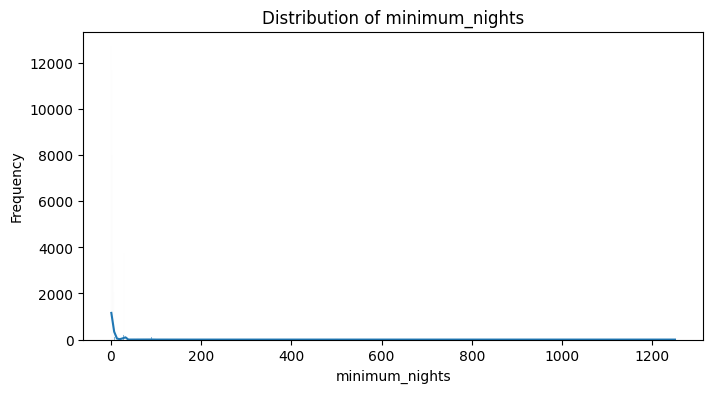

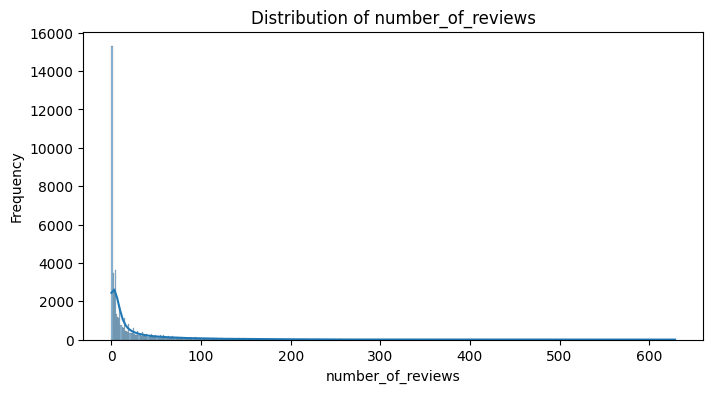

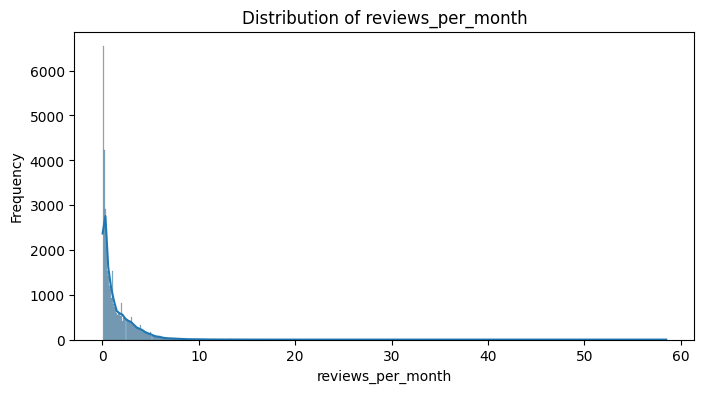

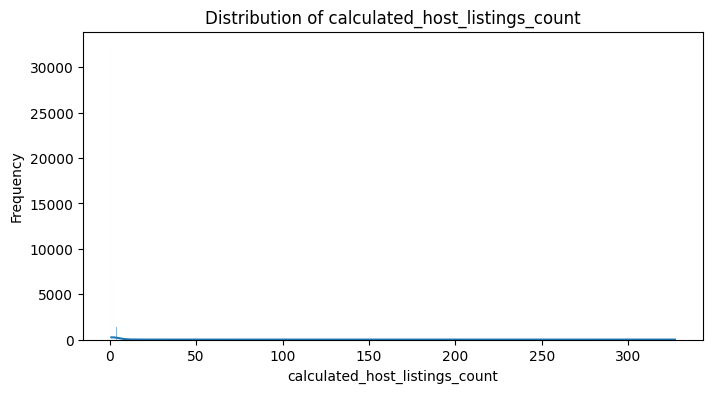

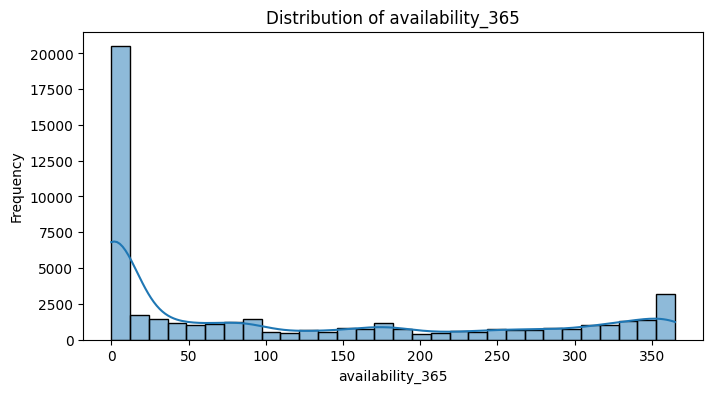

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of each numerical feature
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Verifying Data Quality


Missing Values in Each Column:
name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64


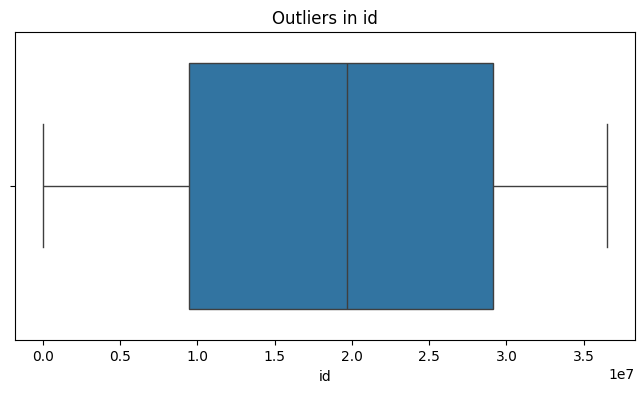

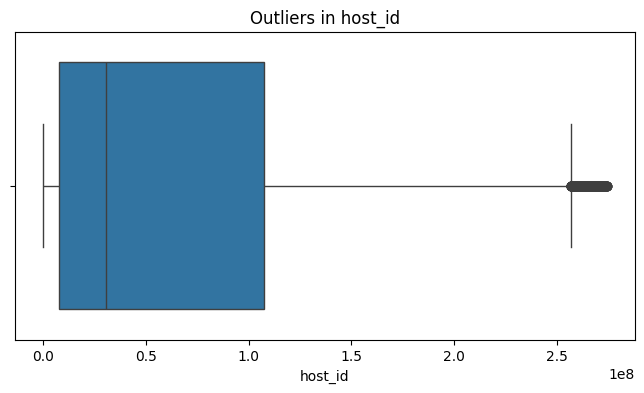

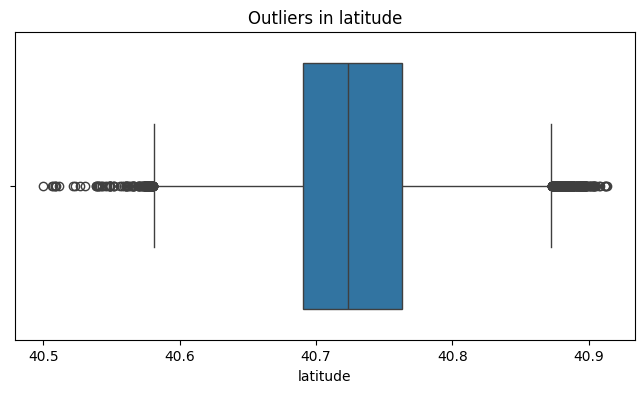

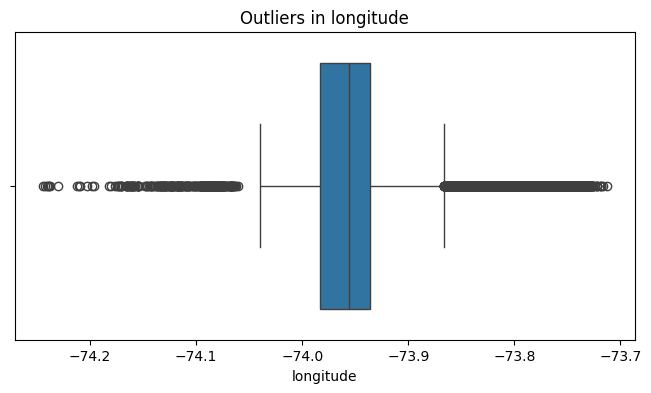

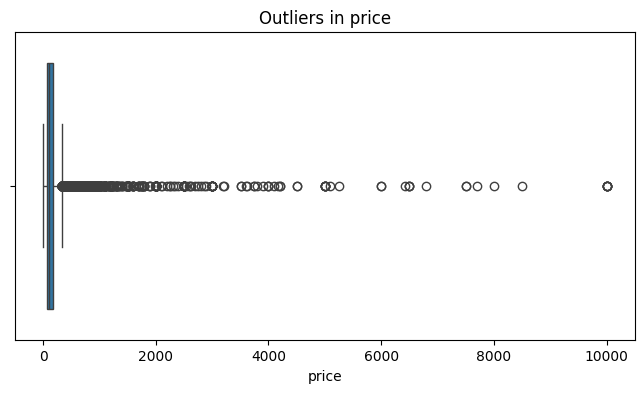

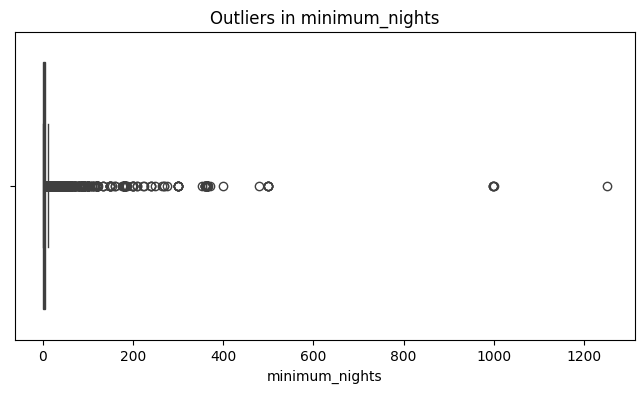

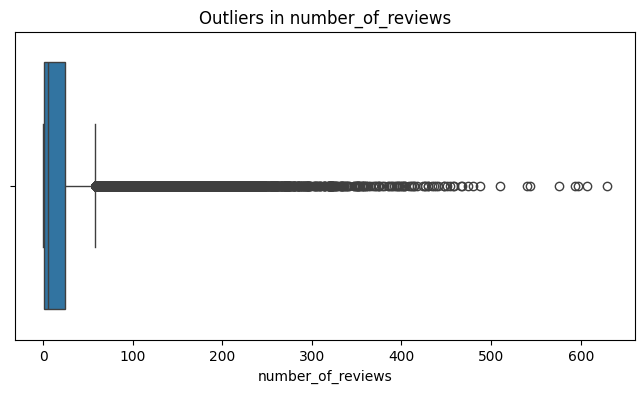

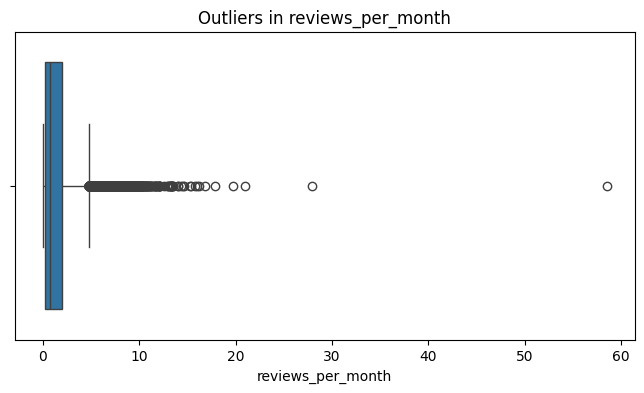

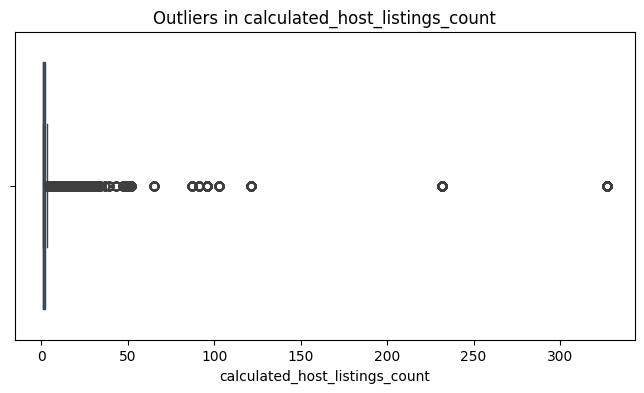

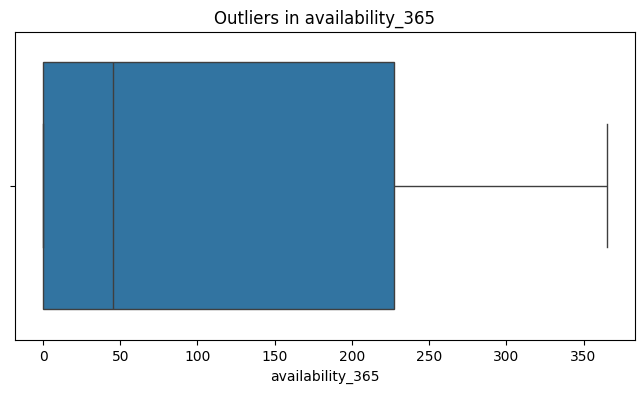

In [8]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

# Identify potential outliers in numerical columns using boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Outliers in {col}')
    plt.xlabel(col)
    plt.show()


# 2. Data Preparation

## Data Cleaning

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('AB_NYC_2019.csv')

# Check for missing values
print("Missing values in each column before cleaning:")
print(data.isnull().sum())

# Handling missing values
# 1. Fill missing values in 'reviews_per_month' with 0 (assuming no reviews means 0 reviews)
data['reviews_per_month'].fillna(0, inplace=True)

# 2. Drop rows where 'name' or 'host_name' is missing, as these may be crucial identifiers
data.dropna(subset=['name', 'host_name'], inplace=True)

# Check for missing values again to confirm they've been handled
print("\nMissing values in each column after cleaning:")
print(data.isnull().sum())

# Correct data formats if necessary (e.g., converting 'last_review' to datetime format)
data['last_review'] = pd.to_datetime(data['last_review'], errors='coerce')

# Check if there are any inconsistencies in categorical data
print("\nUnique values in 'neighbourhood_group' column:")
print(data['neighbourhood_group'].unique())

print("\nUnique values in 'room_type' column:")
print(data['room_type'].unique())


Missing values in each column before cleaning:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values in each column after cleaning:
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude     

<ipython-input-9-5223e48b0992>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews_per_month'].fillna(0, inplace=True)


## Data Transformation

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Scaling numerical features
numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                      'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Encoding categorical features
# One-hot encode 'neighbourhood_group' and 'room_type' (drop_first=True to avoid multicollinearity)
data = pd.get_dummies(data, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Check the transformed dataset
print("\nDataset after scaling and encoding:")
print(data.head())



Dataset after scaling and encoding:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood  latitude  longitude  price  minimum_nights  \
0         John    Kensington -1.493773  -0.437612    149       -0.300329   
1     Jennifer       Midtown  0.452597  -0.684585    225       -0.300329   
2    Elisabeth        Harlem  1.468605   0.222498    150       -0.200426   
3  LisaRoxanne  Clinton Hill -0.803291  -0.164426     89       -0.300329   
4        Laura   East Harlem  1.275857   0.177220     80        0.149232   

   number_of_reviews last_review  reviews_per_month  \
0          -0.320388  2018-10-

## Feature Selection

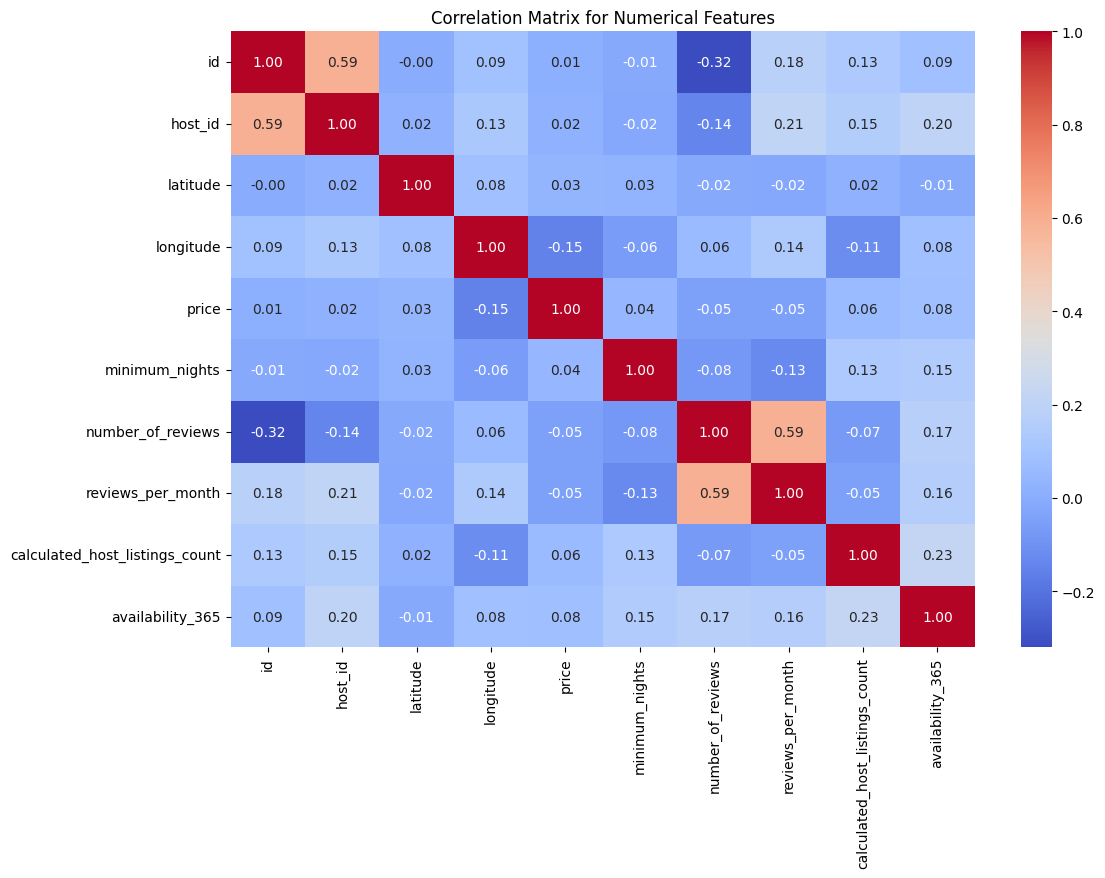


Selected Features:
   latitude  longitude  minimum_nights  number_of_reviews  reviews_per_month  \
0 -1.493773  -0.437612       -0.300329          -0.320388          -0.551649   
1  0.452597  -0.684585       -0.300329           0.487703          -0.445217   
2  1.468605   0.222498       -0.200426          -0.522411          -0.683125   
3 -0.803291  -0.164426       -0.300329           5.538271           2.221862   
4  1.275857   0.177220        0.149232          -0.320388          -0.620518   

   calculated_host_listings_count  availability_365  \
0                       -0.034837          1.916263   
1                       -0.156180          1.840280   
2                       -0.186516          1.916263   
3                       -0.186516          0.616965   
4                       -0.186516         -0.857091   

   neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0                          True                          False   
1                         False     

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate the correlation matrix to identify relevant features
# Select only numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr() # Calculate correlation on numerical data only

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

# Based on correlation analysis and domain knowledge, select features for the model
# Selecting relevant features based on correlations and excluding highly correlated or less informative features
selected_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                     'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
                     'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
                     'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
                     'room_type_Private room', 'room_type_Shared room']

# Define the target variable as 'price'
target = 'price'

# Separate the features (X) and target variable (y)
X = data[selected_features]
y = data[target]

# Display the final feature set and target
print("\nSelected Features:")
print(X.head())
print("\nTarget Variable:")
print(y.head())

# 3. Modeling

##Model Selection

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store the results
model_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    model_results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R^2": r2
    }

# Display the results
print("Model Performance Comparison:")
for model_name, metrics in model_results.items():
    print(f"\n{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Model Performance Comparison:

Linear Regression Performance:
MAE: 72.9533
MSE: 45401.3477
RMSE: 213.0759
R^2: 0.1004

Random Forest Performance:
MAE: 68.1695
MSE: 48337.0689
RMSE: 219.8569
R^2: 0.0422

Gradient Boosting Performance:
MAE: 66.4096
MSE: 42906.5154
RMSE: 207.1389
R^2: 0.1498


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Hyperparameter Tuning

### Random Forest Hyperparameter Tuning

In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define a randomized search with limited iterations
rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    n_iter=10,  # Limit the number of random combinations tested
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)

X_sample = X_train.sample(frac=0.3, random_state=42)
y_sample = y_train[X_sample.index]

# Fit the RandomizedSearchCV object to the data
rf_random_search.fit(X_sample, y_sample)

# Best parameters and score
print("\nBest parameters for Random Forest (Randomized Search):")
print(rf_random_search.best_params_)
print("Best score (MSE):", -rf_random_search.best_score_)


Best parameters for Random Forest (Randomized Search):
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None}
Best score (MSE): 58452.77502965988


### Gradient Boosting Hyperparameter Tuning

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Define a randomized search with limited iterations for Gradient Boosting
gb_random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_param_grid,
    n_iter=10,  # Limit the number of random combinations tested
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42
)

# Using the same sample from X_train and y_train to speed up the process
gb_random_search.fit(X_sample, y_sample)

# Best parameters and score
print("\nBest parameters for Gradient Boosting (Randomized Search):")
print(gb_random_search.best_params_)
print("Best score (MSE):", -gb_random_search.best_score_)



Best parameters for Gradient Boosting (Randomized Search):
{'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 3, 'learning_rate': 0.1}
Best score (MSE): 58532.44497642151


## Compare Different Models

In [17]:
# Refit the models with the best parameters found
# Initialize models with optimized parameters
optimized_rf = RandomForestRegressor(
    n_estimators=rf_random_search.best_params_['n_estimators'], # Changed rf_grid_search to rf_random_search
    max_depth=rf_random_search.best_params_['max_depth'], # Changed rf_grid_search to rf_random_search
    min_samples_split=rf_random_search.best_params_['min_samples_split'], # Changed rf_grid_search to rf_random_search
    min_samples_leaf=rf_random_search.best_params_['min_samples_leaf'], # Changed rf_grid_search to rf_random_search
    random_state=42
)

optimized_gb = GradientBoostingRegressor(
    n_estimators=gb_random_search.best_params_['n_estimators'],
    learning_rate=gb_random_search.best_params_['learning_rate'],
    max_depth=gb_random_search.best_params_['max_depth'],
    min_samples_split=gb_random_search.best_params_['min_samples_split'],
    random_state=42
)

# Train and evaluate the optimized models
# ... (rest of the code remains the same)

# 4. Evaluation

## Mean Baseline Model

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Baseline Model - Mean Prediction
baseline_pred = np.full_like(y_test, y_train.mean())

# Evaluate the baseline model
baseline_mae = mean_absolute_error(y_test, baseline_pred)
baseline_mse = mean_squared_error(y_test, baseline_pred)
baseline_rmse = mean_squared_error(y_test, baseline_pred, squared=False)
baseline_r2 = r2_score(y_test, baseline_pred)

# Display baseline performance
print("Baseline Model Performance:")
print(f"MAE: {baseline_mae:.4f}")
print(f"MSE: {baseline_mse:.4f}")
print(f"RMSE: {baseline_rmse:.4f}")
print(f"R^2: {baseline_r2:.4f}")


Baseline Model Performance:
MAE: 90.6572
MSE: 50471.3956
RMSE: 224.6584
R^2: -0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Evaluating Optimized Models

In [19]:
# Define the final models dictionary using the best estimators from the RandomizedSearchCV
final_models = {
    "Optimized Random Forest": rf_random_search.best_estimator_,
    "Optimized Gradient Boosting": gb_random_search.best_estimator_
}

# Initialize a dictionary to store the performance of each model
evaluation_results = {}

# Evaluate each optimized model
for model_name, model in final_models.items():
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    # Store results
    evaluation_results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R^2": r2
    }

# Display evaluation results for each model
print("\nOptimized Model Performance Comparison:")
for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Optimized Model Performance Comparison:

Optimized Random Forest Performance:
MAE: 70.7281
MSE: 46713.4298
RMSE: 216.1329
R^2: 0.0744

Optimized Gradient Boosting Performance:
MAE: 68.6852
MSE: 44972.1174
RMSE: 212.0663
R^2: 0.1089


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Comparing with Baseline Model

In [20]:
print("\nComparison with Baseline Model:")

# Calculate improvement for each metric compared to the baseline
for model_name, metrics in evaluation_results.items():
    print(f"\nImprovements with {model_name} over Baseline:")
    improvement_mae = baseline_mae - metrics['MAE']
    improvement_mse = baseline_mse - metrics['MSE']
    improvement_rmse = baseline_rmse - metrics['RMSE']
    improvement_r2 = metrics['R^2'] - baseline_r2

    print(f"MAE Improvement: {improvement_mae:.4f}")
    print(f"MSE Improvement: {improvement_mse:.4f}")
    print(f"RMSE Improvement: {improvement_rmse:.4f}")
    print(f"R^2 Improvement: {improvement_r2:.4f}")



Comparison with Baseline Model:

Improvements with Optimized Random Forest over Baseline:
MAE Improvement: 19.9291
MSE Improvement: 3757.9658
RMSE Improvement: 8.5255
R^2 Improvement: 0.0745

Improvements with Optimized Gradient Boosting over Baseline:
MAE Improvement: 21.9720
MSE Improvement: 5499.2782
RMSE Improvement: 12.5921
R^2 Improvement: 0.1090


# 5. Deployment

## Saving the Final Model

In [21]:
import joblib

# Assuming 'optimized_rf' is the final chosen model (Random Forest in this case)
joblib.dump(optimized_rf, 'final_airbnb_price_model.pkl')

# To load the model later
# loaded_model = joblib.load('final_airbnb_price_model.pkl')


['final_airbnb_price_model.pkl']

In [22]:
from google.colab import files
files.download('final_airbnb_price_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>